<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#서울-유동인구-데이터-구별-유동인구-집단-수-단계구분도" data-toc-modified-id="서울-유동인구-데이터-구별-유동인구-집단-수-단계구분도-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>서울 유동인구 데이터 구별 유동인구 집단 수 단계구분도</a></span><ul class="toc-item"><li><span><a href="#구별-유동-모집단-수" data-toc-modified-id="구별-유동-모집단-수-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>구별 유동 모집단 수</a></span></li><li><span><a href="#구별-및-성별-유동-모집단-수" data-toc-modified-id="구별-및-성별-유동-모집단-수-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>구별 및 성별 유동 모집단 수</a></span></li><li><span><a href="#구별-및-연령대별-유동-모집단-수" data-toc-modified-id="구별-및-연령대별-유동-모집단-수-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>구별 및 연령대별 유동 모집단 수</a></span></li><li><span><a href="#구별-월별-유동-모집단-수" data-toc-modified-id="구별-월별-유동-모집단-수-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>구별 월별 유동 모집단 수</a></span></li><li><span><a href="#코로나-전후-비교" data-toc-modified-id="코로나-전후-비교-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>코로나 전후 비교</a></span><ul class="toc-item"><li><span><a href="#코로나-전" data-toc-modified-id="코로나-전-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>코로나 전</a></span></li><li><span><a href="#코로나-후" data-toc-modified-id="코로나-후-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>코로나 후</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

import folium
from folium.plugins import MarkerCluster
import json
import re

import warnings
warnings.filterwarnings('ignore')

C:\spyder\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## 서울 유동인구 데이터 구별 유동인구 집단 수 단계구분도

* date : 날짜 YYYY-MM-DD
* hour : 시
* birth_year : 유동인구의 연령대
* sex : 유동인구의 성별
* province : 특별시/광역시/도
* city : 시/군/구
* fp_num : 유동 모집단 수

In [2]:
df1 = pd.read_csv('data/covid/SeoulFloating.csv')
df1

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [4]:
df1.isnull().sum()

date          0
hour          0
birth_year    0
sex           0
province      0
city          0
fp_num        0
dtype: int64

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [9]:
df1['province'].unique()

array(['Seoul'], dtype=object)

In [10]:
df1['city'].unique()

array(['Dobong-gu', 'Dongdaemun-gu', 'Dongjag-gu', 'Eunpyeong-gu',
       'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu', 'Gangseo-gu',
       'Geumcheon-gu', 'Guro-gu', 'Gwanak-gu', 'Gwangjin-gu', 'Jongno-gu',
       'Jung-gu', 'Jungnang-gu', 'Mapo-gu', 'Nowon-gu', 'Seocho-gu',
       'Seodaemun-gu', 'Seongbuk-gu', 'Seongdong-gu', 'Songpa-gu',
       'Yangcheon-gu', 'Yeongdeungpo-gu', 'Yongsan-gu'], dtype=object)

구별 유동 모집단 수 계산

In [6]:
df_city = df1.groupby(['city']).fp_num.sum()
df_city = df_city.reset_index(name='fp_num')

구별 및 성별 유동 모집단 수 계산

In [28]:
df_sex = df1.groupby(['city', 'sex']).fp_num.sum()
df_sex = df_sex.reset_index(name='fp_num')

구별 및 연령대별 유동 모집단 수 계산

In [29]:
df_age = df1.groupby(['city', 'birth_year']).fp_num.sum()
df_age = df_age.reset_index(name='fp_num')

In [30]:
df_age['birth_year'].unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

구별 및 월별 유동 모집단 수 계산

In [4]:
df1['date'] = pd.to_datetime(df1['date'], format="%Y-%m-%d")
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month

In [6]:
df1.tail()

,date,hour,birth_year,sex,province,city,fp_num,year,month
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620,2020,5
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560,2020,5
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960,2020,5
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420,2020,5
1084799,2020-05-31,23,40,male,Seoul,Eunpyeong-gu,38650,2020,5


In [7]:
df_month = df1.groupby(['city', 'month']).fp_num.mean()
df_month = df_month.reset_index(name='fp_num')
df_month[['month']] = df_month[['month']].astype(str)
df_month

,city,month,fp_num
0,Dobong-gu,1,20123.304211
1,Dobong-gu,2,20158.989464
2,Dobong-gu,3,20053.729167
3,Dobong-gu,4,19991.981481
4,Dobong-gu,5,19918.666214
...,...,...,...
120,Yongsan-gu,1,17964.896953
121,Yongsan-gu,2,18351.496648
122,Yongsan-gu,3,17311.094907
123,Yongsan-gu,4,17531.775463


In [12]:
df_mon = df_month.groupby(['month']).fp_num.mean()
df_mon = df_mon.reset_index(name='fp_num')
df_mon

,month,fp_num
0,1,27462.400448
1,2,28285.092385
2,3,27020.319954
3,4,27267.766389
4,5,27133.198234


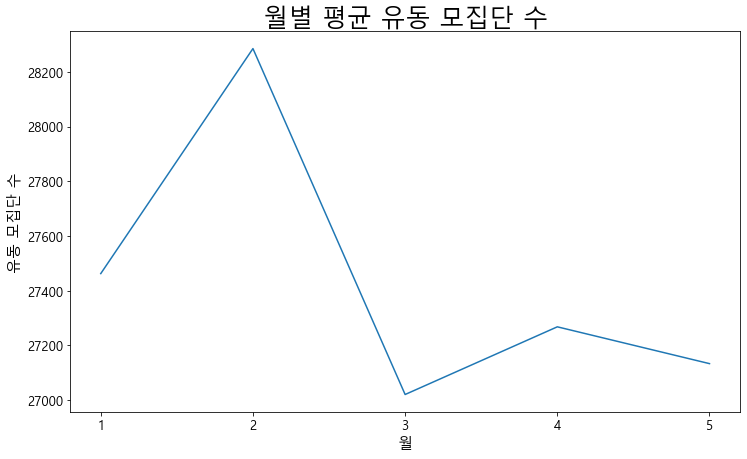

In [11]:
plt.figure(figsize=(12, 7))
plt.plot(df_mon['month'], df_mon['fp_num'])
plt.title('월별 평균 유동 모집단 수', fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('월', fontsize=15)
plt.ylabel('유동 모집단 수', fontsize=15)
plt.show()

### 구별 유동 모집단 수

In [7]:
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

**전체 유동 모집단 수**

In [9]:
df_city.sort_values(by='fp_num')

,city,fp_num
24,Yongsan-gu,767372100
12,Jongno-gu,776978120
13,Jung-gu,791514570
8,Geumcheon-gu,820463490
4,Gangbuk-gu,864006770
0,Dobong-gu,869945340
18,Seodaemun-gu,920166860
20,Seongdong-gu,926230930
11,Gwangjin-gu,1034012660
1,Dongdaemun-gu,1051025930


In [8]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str,
               data=df_city,
               columns = ['city', 'fp_num'],
               fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
               key_on = 'properties.name_eng')
map

### 구별 및 성별 유동 모집단 수

**남성의 유동 모집단 수**

In [95]:
m_df = df_sex.loc[df_sex['sex'] == 'male']

m_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
m_map.choropleth(geo_data=geo_str,
                 data=m_df,
                 columns = ['city', 'fp_num'],
                 fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                 key_on = 'properties.name_eng')
m_map

**여성의 유동 모집단 수**

In [96]:
f_df = df_sex.loc[df_sex['sex'] == 'female']

f_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
f_map.choropleth(geo_data=geo_str,
                 data=f_df,
                 columns = ['city', 'fp_num'],
                 fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                 key_on = 'properties.name_eng')
f_map

### 구별 및 연령대별 유동 모집단 수

**20대 유동 모집단 수**

In [97]:
df_20 = df_age.loc[df_age['birth_year'] == 20]

map_20 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_20.choropleth(geo_data=geo_str,
                  data=df_20,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_20

**30대 유동 모집단 수**

In [98]:
df_30 = df_age.loc[df_age['birth_year'] == 30]

map_30 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_30.choropleth(geo_data=geo_str,
                  data=df_30,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_30

**40대 유동 모집단 수**

In [99]:
df_40 = df_age.loc[df_age['birth_year'] == 40]

map_40 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_40.choropleth(geo_data=geo_str,
                  data=df_40,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_40

**50대 유동 모집단 수**

In [100]:
df_50 = df_age.loc[df_age['birth_year'] == 50]

map_50 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_50.choropleth(geo_data=geo_str,
                  data=df_50,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_50

**60대 유동 모집단 수**

In [101]:
df_60 = df_age.loc[df_age['birth_year'] == 60]

map_60 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_60.choropleth(geo_data=geo_str,
                  data=df_60,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_60

**70대 유동 모집단 수**

In [102]:
df_70 = df_age.loc[df_age['birth_year'] == 70]

map_70 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_70.choropleth(geo_data=geo_str,
                  data=df_70,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_70

### 구별 월별 유동 모집단 수

**1월 유동 모집단 수**

In [103]:
df_1 = df_month.loc[df_month['month'] == 1]

map_1 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_1.choropleth(geo_data=geo_str,
                  data=df_1,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_1

**2월 유동 모집단 수**

In [104]:
df_2 = df_month.loc[df_month['month'] == 2]

map_2 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_2.choropleth(geo_data=geo_str,
                  data=df_2,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_2

**3월 유동 모집단 수**

In [105]:
df_3 = df_month.loc[df_month['month'] == 3]

map_3 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_3.choropleth(geo_data=geo_str,
                  data=df_3,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_3

**4월 유동 모집단 수**

In [106]:
df_4 = df_month.loc[df_month['month'] == 4]

map_4 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_4.choropleth(geo_data=geo_str,
                  data=df_4,
                  columns=['city', 'fp_num'],
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_4

**5월 유동 모집단 수**

In [107]:
df_5 = df_month.loc[df_month['month'] == 5]


map_5 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map_5.choropleth(geo_data=geo_str,
                  data=df_5,
                  columns=['city', 'fp_num'],
                 fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                  key_on='properties.name_eng')
map_5

### 코로나 전후 비교

In [68]:
before = df1.loc[df1['date'] < pd.to_datetime('2020-02-18')]
before = before.groupby(['city']).fp_num.mean()
before = before.reset_index(name='count')

after = df1.loc[df1['date'] >= pd.to_datetime('2020-02-18')]
after = after.groupby(['city']).fp_num.mean()
after = after.reset_index(name='count')

In [71]:
before.sort_values(by=['count'])

,city,count
24,Yongsan-gu,17939.517506
12,Jongno-gu,18506.396846
8,Geumcheon-gu,18937.686632
13,Jung-gu,19330.298756
4,Gangbuk-gu,19853.698640
0,Dobong-gu,19878.837529
20,Seongdong-gu,21161.454716
18,Seodaemun-gu,21220.196036
11,Gwangjin-gu,23621.422888
1,Dongdaemun-gu,24018.932292


In [70]:
after.sort_values(by=['count'])

,city,count
24,Yongsan-gu,17565.483293
12,Jongno-gu,17625.327719
13,Jung-gu,17731.754600
8,Geumcheon-gu,18894.376015
4,Gangbuk-gu,19938.759470
0,Dobong-gu,20127.850717
18,Seodaemun-gu,21199.231264
20,Seongdong-gu,21431.783685
11,Gwangjin-gu,23926.884131
1,Dongdaemun-gu,24316.430262


#### 코로나 전

In [72]:
bef = folium.Map(location=[37.5502, 126.982], zoom_start=10)

bef.choropleth(geo_data=geo_str,
               data=before,
               columns=['city', 'count'],
               fill_color='YlOrRd',
               fill_opacity=0.7,
               line_opacity=0.3,
               key_on='properties.name_eng')
bef

#### 코로나 후

In [73]:
aft = folium.Map(location=[37.5502, 126.982], zoom_start=10)

aft.choropleth(geo_data=geo_str,
               data=after,
               columns=['city', 'count'],
               fill_color='YlOrRd',
               fill_opacity=0.7,
               line_opacity=0.3,
               key_on='properties.name_eng')
aft